In [70]:
import numpy as np
from scipy.optimize import root
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1

In [71]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02
A = α * β
K = A**(1/(1 - α))

In [72]:
F = (α * K**(α - 1)) / (K**α - K)
G = -(α * K**(α - 1) * (α + K**(α - 1))) / (K**α - K)
H = (α**2 * K**(2 * (α - 1))) / (K**α - K)
L = -(α * K**(2 * (α - 1))) / (K**α - K)
M = (α**2 * K**(2 * (α - 1))) / (K**α - K)

P = (-G - np.sqrt(G**2 - 4 * F * H)) / (2 * F)
Q = -(L * ρ_z + M) / (F * ρ_z + F * P + G)

# Create K and z grids
K_t_grid = np.linspace(1.5, 10)
z_grid = np.linspace(-1, 1)

# Create a meshgrid
K_t, z = np.meshgrid(K_t_grid, z_grid)

# Calculate K_prime across the grid
K_prime = lambda K, Z: K + P * (K_t - K) + Q * z

y = K_prime(K_t, z)

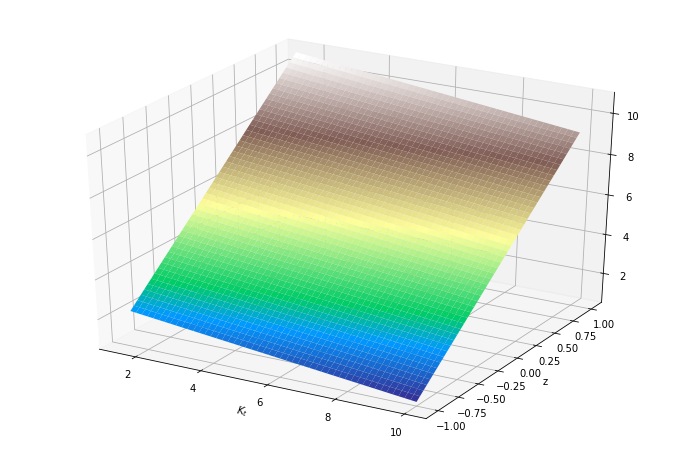

In [73]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(K_t, z, y.T, cmap='terrain')
ax.set(xlabel='$K_t$', ylabel='z')
plt.show()

## Exercise 4

In [141]:
# Parameters
γ = 2.5
ξ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

In [142]:
def solve_ss(params, γ, ξ, β, α, a, δ, z, τ):
    k, l = params
    w = (1 - α) * k**α * (l * np.exp(z))**(-α)  # SS wage
    r = α * k**(α - 1) * (l * np.exp(z))**(1 - α)  # SS interest rate
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + T
    eq1 = β * ((r - δ) * (1 - τ) + 1) - 1
    eq2 = c**(-γ) * w * (1 - τ) - a * (1 - l)**(-ξ)
    return eq1, eq2

In [143]:
ss = root(solve_ss, 0.2 * np.ones(2), args=(γ, ξ, β, α, a, δ, z, τ))
k_bar, l_bar, = ss.x
k_bar, l_bar

(4.225229027461345, 0.5797914532002376)

In [144]:
y_bar = k_bar**α * l_bar**(1 - α) * np.exp(z)
y_bar

1.2832261089590185

In [145]:
i_bar = δ * k_bar
i_bar

0.4225229027461345

In [159]:
def return_ss(params_vec):
    
    γ, ξ, β, α, a, δ, z, τ = params_vec
    
    ss = root(solve_ss, 0.2 * np.ones(2), args=(γ, ξ, β, α, a, δ, z, τ))
    k_bar, l_bar, = ss.x
    y_bar = k_bar**α * l_bar**(1 - α) * np.exp(z)
    i_bar = δ * k_bar
    w_bar = (1 - α) * k_bar**α * (l_bar * np.exp(z))**(-α)
    r_bar = α * k_bar**(α - 1) * (l_bar * np.exp(z))**(1 - α)
    T_bar = τ * (w_bar * l_bar + (r_bar - δ) * k_bar)
    c_bar = (1 - τ) * (w_bar * l_bar + (r_bar - δ) * k_bar) + T_bar
    
    return np.array([k_bar, l_bar, y_bar, i_bar, 
                     w_bar, r_bar, T_bar, c_bar])

## Exercise 5

In [202]:
ɛ = 1e-6
params = np.array([γ, ξ, β, α, a, δ, z, τ])
derivatives = np.zeros((len(params), len(params)))
ss = return_ss(params)

for i in range(len(params)):
    params_temp = params.copy()
    params_temp[i] += ɛ
    derivatives[:, i] = (return_ss(params_temp) - ss) / ɛ

In [211]:
print(derivatives.round(1))

[[  0.1  -0.8  65.4  26.   -1.8 -48.3   4.   -2.3]
 [  0.   -0.1   0.3  -0.8  -0.3   1.3  -0.   -0.1]
 [  0.   -0.2   8.3   4.7  -0.6  -4.1   1.7  -0.5]
 [  0.   -0.1   6.5   2.6  -0.2  -0.6   0.4  -0.2]
 [  0.   -0.    8.    4.4   0.   -7.3  -0.   -0.2]
 [ -0.    0.   -1.1  -0.   -0.    1.    0.    0. ]
 [  0.   -0.    0.1   0.1  -0.   -0.2   0.    0.8]
 [  0.   -0.2   1.8   2.1  -0.4  -3.5   0.   -0.2]]
